# 머신러닝 알고리즘
## 1. 머신러닝 개요
### 1.1 머신러닝 효과
- 대량의 데이터를 검토하고 계산하기 때문에 알지못했던 동향이나 패턴 파악 가능
- 보유 데이터 양이 많아 질 수록 머신러닝의 정확성과 효율성은 증가함
- 인간이 직관적으로 이해하기 어려운 데이터도 모두 활용하여 분석 가능

### 1.2 머신러닝 종류

**지도학습 (Supervised Learning)**
- 컴퓨터에게 학습할 데이터를 제공할 때 정보와 정답을 같이 포함

**비지도학습 (Unsupervised Learning)**
- 데이터 제공시 정답을 제공하지 않기 때문에 데이터들이 얼마나 서로 비슷한지 비교하여 학습함 (여러가지 콘텐츠 플랫폼 : Netflix, Watcha, Wavve...)

**강화학습 (Reinforcement Learning)**
- 기계에게 주어진 규칙 안에서 여러가지를 시도해 보고 그 결과에 대한 보상을 제공함으로써 학습
 

## 2. 머신러닝 프로세스
1. 데이터 전처리

2. 탐색적 데이터 분석

3. 모델 선택 및 구축

4. 성능평가 및 적용


### 2.1데이터 전처리(가장 많은 시간이 소요)
- 데이터 정제 (data cleaning) : 지저분한 데이터를 머신러닝 모델에 넣을 수 있도록 깔끔하게 정제하는 과정
- 특성 엔지니어링 (feature engineering) : 분석 목적에 맞게 새로운 특성(feature)을 생성하는 과정
- 피쳐 스케일링 (feature scaling) : 특성들의 범위가 다를 때 범위를 맞춰주는 과정
- 더미화 (dummification) : 범주 형태의 데이터를 수치형 0, 1로 바꿔주는 과정


### 2.2 탐색적 데이터 분석
- 사용할 데이터에 대해 이해하는 과정
- 데이터가 가진 특징을 찾고, 패턴을 발견하는 과정
- 예) 데이터 탐색, 히스토그램, 상관분석, 그룹별 연산 등


### 2.3 모델 선택 및 구축
- 모델(model) : 컴퓨터가 데이터를 학습하고 원하는 값을 계산하는 방법(알고리즘)


### 2.4 성능 평가 및 적용
- 지도학습 : 모델이 예측한 정답과 실제 정답이 일치하는 지 비교
- 비지도학습 : 비슷한 특성들이 가진 패턴을 잘 찾았는지 평가

---

# [K-NN (최근접 이웃법 : K-Nearest Neighbors)]

## 1. K-NN 개요
- 새로운 데이터를 분류하기 위해 사용하는 머신러닝 알고리즘
- 데이터들 사이의 거리를 측정하여 어떤 데이터가 가까운지 파악하고 새로운 데이터 분류 ( 지도 학습)

### 1.1 K-NN 과정
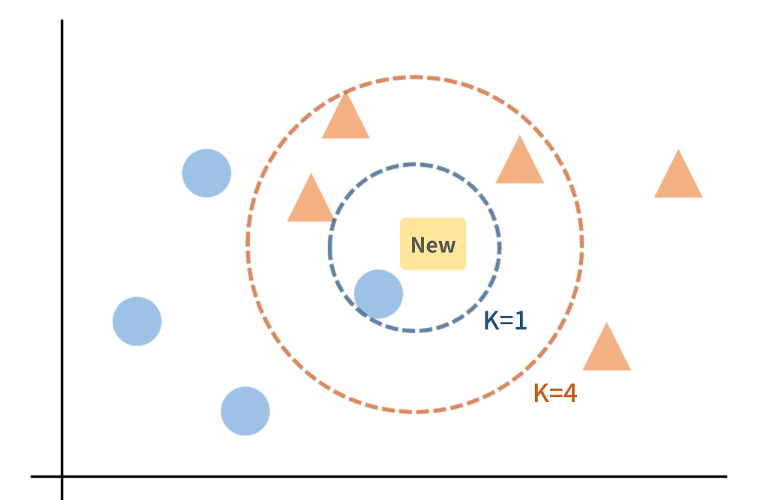
- K= 1로 설정 할 경우 : [New = 동그라미]
- K= 4로 설정 할 경우 : [New = 세모]
- K가 너무 작을 경우 지엽적으로 판단하여 잘못 분류할 수 있음
- K가 너무 클 경우 여러 분류의 데이터를 포함해서 정확도가 떨어질 수 있음


### 1.2 K-NN 장단점
**장점**
- 알고리즘이 간단하고 구현이 쉬움
- 수치형 데이터를 분류하는 작업에 적용하기 좋음

**단점**
- 데이터가 큰 경우 계산이 느림


### 1.3 데이터의 거리 측정
**유클리디안 거리(Euclidean Distance)**
- 두 점간의 거리를 자로 잴 수 있다고 생각했을 때, 최단 거리 계산하는 방법(피타고라스 정리 이용)
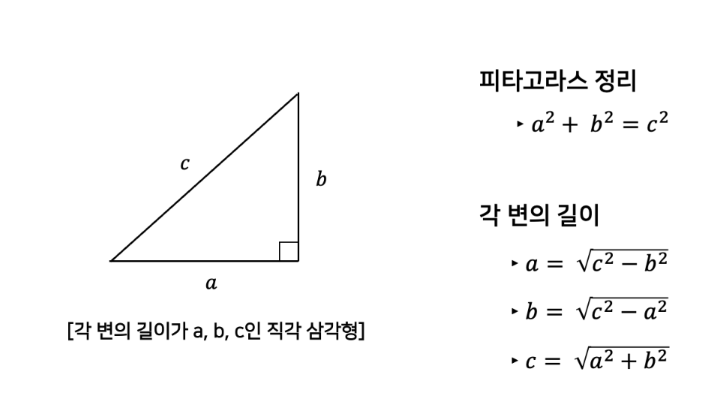
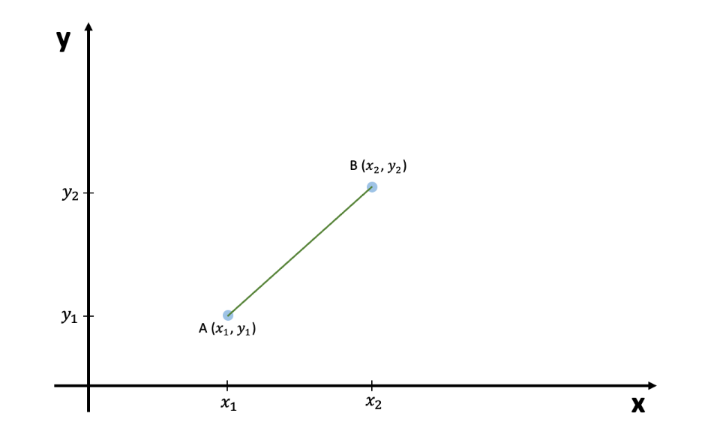
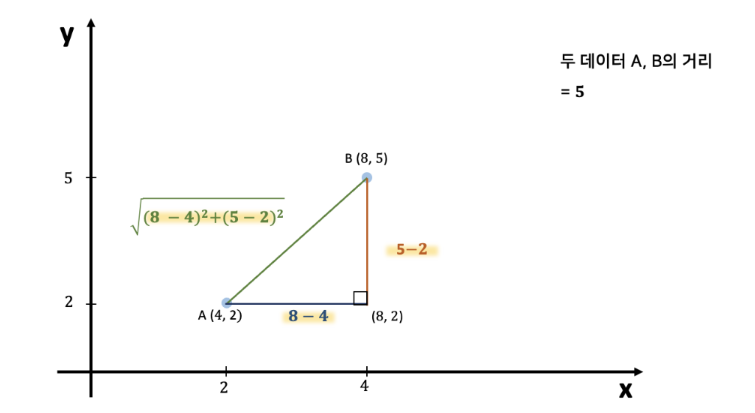

## 2. K-NN 실습

In [1]:
# 데이터 준비
import pandas as pd

data = pd.read_csv('./Student_Performance.csv')
data.head()

,preparation,math,reading,writing,gender
0,none,0.72,0.72,0.74,F
1,completed,0.69,0.90,0.88,F
2,none,0.90,0.95,0.93,F
3,none,0.47,0.57,0.44,M
4,none,0.76,0.78,0.75,M


In [2]:
# K-NN 모델 생성
from sklearn.neighbors import KNeighborsClassifier

X = data[['math', 'reading','writing']]
y = data[['preparation']]

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)

score = knn_model.score(X,y)

score

C:\Users\Sanghyuk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.771

---

# [의사결정나무]

## 1. 의사결정나무 개요
- 지도 학습
- 데이터에 있는 패턴을 찾아내고 조건을 통해 데이터를 분할하며 예측
- 조건에 해당하는 데이터는 좌측으로, 해당하지 않는 데이터는 우측으로 분류
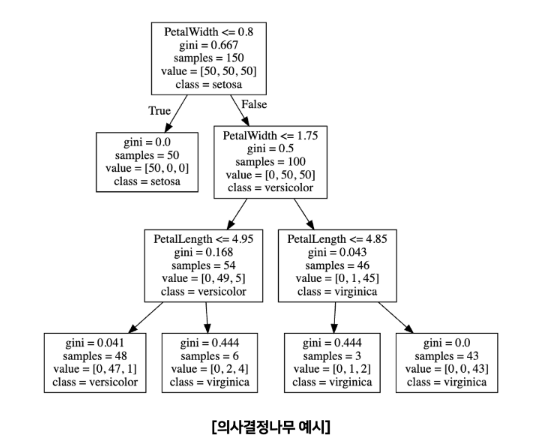

### 1.1 의사결정나무 용어
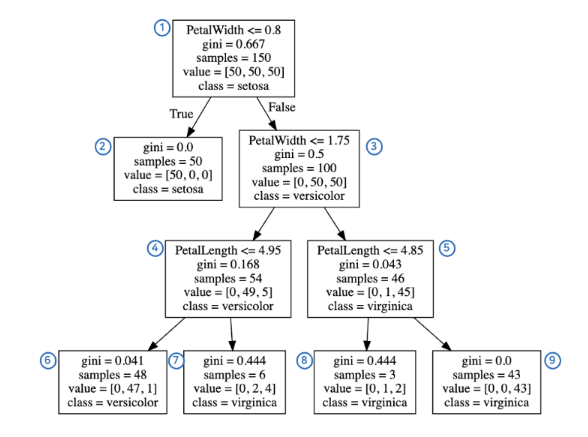

- 뿌리마디 : 나무구조가 시작되는 마디 -> **[1번] (모든 데이터를 담고 있음)**
- 부모마디 : 자식마디를 가지고 있는 마디 -> **[1번] 마디는 [2번], [3번]의 부모마디**
- 자식마디 : 부모마디에서 갈라져나온 마디 -> **[2번], [3번] 마디는 [1번]의 자식마디**
- 끝  마디 : 각 나무 줄기에서 마지막에 위치한 마디 -> **[6번], [7번], [8번], [9번]**
- 중간마디 : 중간에 위치한 마디
- 깊    이 : 뿌리마디를 제외하고 끝마디까지 연결된 마디의 개수 -> **3의 깊이를 가짐**


### 1.3 의사결정나무의 장단점
**장점**
- 규칙이 쉽고 간단한 모형의 경우 해석이 쉬움 : 마디마다 하나의 기준값으로 분류
- 특성의 중요성 비교 가능 : 조건마다 하나의 특성을 기준으로 구분


**단점**
- 모형이 복잡하면 성능이 떨어지며, 해석하기 어려움
- 데이터 변형에 민감함


### 1.4 지니계수
- 의사결정나무 조건 생성기준: 조건을 통해 데이터를 분리했을 때 순수도가 증가하고 불순도가 감소하도록 조건 설정

**불순도와 순도**
- 불순도 : 데이터에 서로 다른 카테고리의 데이터들이 얼마나 섞여 있는지 의미
- 순  도 : 데이터가 얼마나 섞이지 않고 한가지 종류만 있는지 의미

**지니계수(Gini index)**
- 불순도를 측정하는 지표
- 지니계수가 낮을 수록 '불순도가 낮다' = 비슷한 데이터끼리 모여있다.
- 0 ~ 0.5의 값을 가짐
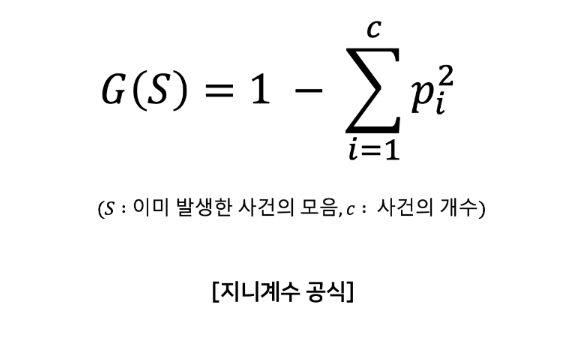
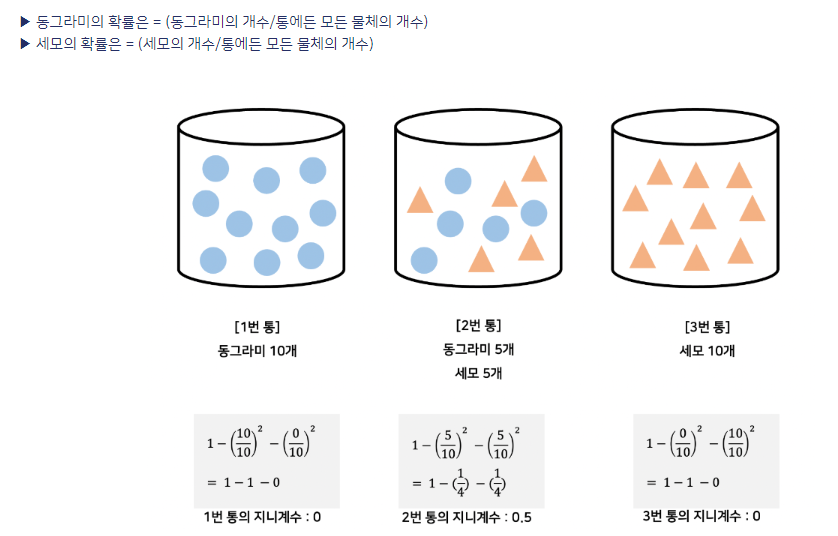

### 2. 의사결정나무 실습

In [ ]:
# 데이터 준비
import pandas as pd

data = pd.read_csv('./Student_Performance.csv')
data.head()

In [5]:
# 의사결정나무 모델 생성
from sklearn.tree import DecisionTreeClassifier

X = data [['math','reading','writing']]
y = data [['preparation']]

tree_model = DecisionTreeClassifier(max_depth = 3) #max_depth = 최대 깊이 숫자
tree_model.fit(X,y)

score = tree_model.score(X,y)
score

0.686

---

# [앙상블 모델]

## 1. 앙상블 모델 개요
- 앙상블(Ensemble) : 여러개의 머신러닝 모델을 만들고 결합


### 1.1 보팅 (Voting)
- 같은 데이터를 활용하여 여러종류의 모델에 적용
- 머신러닝에서 학습 모델은 알고리즘이 제각기 다르고 성능의 차이가 있기 때문에 모델별로 다른 결과를 산출하게됨
- 보팅은 각각의 모델에 대한 산출된 결과 중에서 가장 많이 나온 결과를 채택함
- 보팅을 사용할 때에는 알고리즘의 성격이 다른모델을 사용할수록 유리함


### 1.2 배깅 (Bagging)
- 하나의 모델을 다양하게 학습
- 데이터를 추출할 때는 무작위로 추출하고, 추출한 데이터를 다시 뽑을 수 있는 복원 추출을 사용함
- 배깅은 수행속도가 비교적 빠르고 성능이 좋아 많이 활용됨
- 랜덤포레스트는 배깅과 의사결정나무모델을 사용하는 방법임
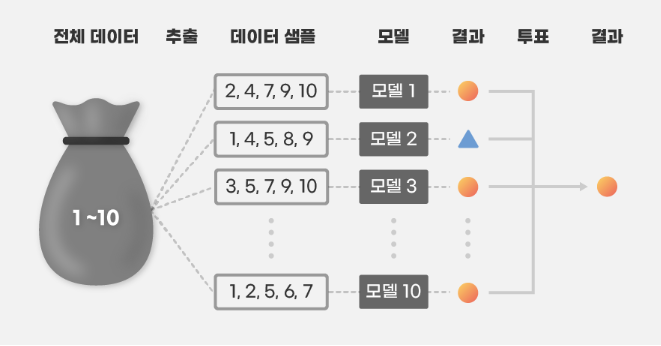

### 1.3 랜덤포레스트 (RandomForest)
- 의사결정 나무에 앙상블 모델을 적용함
- 의사결정 나무 모델을 여러개 생성
- 각 샘플마다 의사결정나무를 만들고 결과를 종합하여 최종 결과 산출


**장점**
- 의사결정나무의 한계점 보완
- 결측치에 강함 : 데이터를 여러샘플로 나누고 조합하기 때문에 높은 정확도를 가짐


**단점**
- 계산에 많은 메모리가 필요하며 속도가 상대적으로 느림

## 2. 랜덤포레스트 실습

In [6]:
# 데이터 준비
import pandas as pd

data = pd.read_csv('./Student_Performance.csv')
data.head()

,preparation,math,reading,writing,gender
0,none,0.72,0.72,0.74,F
1,completed,0.69,0.90,0.88,F
2,none,0.90,0.95,0.93,F
3,none,0.47,0.57,0.44,M
4,none,0.76,0.78,0.75,M


In [7]:
from sklearn.ensemble import RandomForestClassifier

X = data[['math','reading','writing']]
y = data[['preparation']]

rf_model = RandomForestClassifier()
rf_model.fit(X,y)

score = rf_model.score(X,y)
score

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_36604\4228830714.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X,y)


0.99

---

# [K-means 군집분석]

## 1. K-means 군집분석 (Clusting Analysis) 개요
- 군집분석 : 전체 데이터들을 특성에 따라 비슷한 집단으로 묶어주는 분석 모델 (비지도 학습)
- 정답을 기준으로 집단을 묶지 않고, 전체 데이터의 모양을 보고 데이터를 묶어주기 때문에 기준이 명확하지 않을때 사용하기 적합함
- 클러스터 (Cluster) : 군집분석 결과로 묶인 집단


### 1.1 군집분석의 원리와 특징
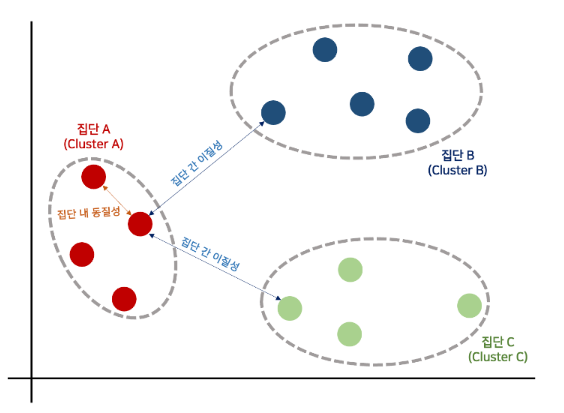
- 비슷한 데이터들끼리 군집만들기가 목적이므로 **유사도가 높은 데이터들끼리 묶임**
- 집단 안의 데이터가 비슷할 수록 집단 내 동질성이 높아짐
- 집단끼리의 데이터가 다를 수록 집단 간 이질성이 높아짐

**"군집분석은 집단 내 동질성"**과 **"집단 내 이질성"**이 **"높아지는 방향"**으로 분석이 진행


### 1.2 군집분석의 활용
**고객분류**
- 고객의 소비 패턴이나 웹사이트 내 행동을 데이터로 삼아서 비슷한 특성을 가진 고객들끼리 묶음
- 같은 고객군에서 많이 구매한 제품을 추천하는 서비스 제공 가능
- 고객군별로 마케팅 전략을 다르게 적용할 수 있음


**검색엔진**
- "유사도"를 바탕으로 구성되어 있음
- 검색어와 비슷한 내용을 가진 내용들은 같은 군집에 속하게 되고 훈련된 군집 모델을 이용해 어떤 결과를 찾아줄 지 결정할 수 있음


**데이터분석**
- 새로운 데이터 셋을 분석할 때 군집분석을 먼저 실행하고 데이터를 파악
- 군집분석의 결과를 바탕으로 각각의 클러스터별로 분석하는 경우 좋은 성능이 나타남


### 1.3 군집분석 과정
(1) 몇 개의 군집으로 나눌지 결정 : K 결정
(2) 무작위(Random)로 K개의 초기 중심 설정
(3) 모든 데이터에 대해 가장 가까운 중심이 있는 군집으로 분류
(4) 군집을 중심으로 군집의 평균값 대체
(5) 3번과 4번 과정 반복 : 더이상 반복해도 군집에 변화가 없으면 중지

**시작은 무작위로 설정된 군집이지만 중심을 새롭게 갱신해 가면서 데이터들을 다시 군집으로 분류할수록 비슷한 데이터들끼리 모임**


### 1.4 군집분석의 장점과 단점
**장점**
- 많은 양의 데이터를 빠르게 분류할 수 있음
- 데이터에 대한 사전 정보가 없이도 분석이 가능함 (비지도 학습)

**단점**
- 이상치의 영향을 많이 받음 : 클러스터 내에서 평균을 계산하기 때문에

## K-means 군집분석 실습

In [9]:
# 데이터 준비
import pandas as pd

data = pd.read_csv('./iris.csv')
data.head()

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [10]:
from sklearn.cluster import KMeans

X = data[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

kmeans = KMeans(n_clusters = 3) #n_clusters = 군집의 수
kmeans.fit(X)

data['cluster'] = kmeans.labels_
data

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,cluster
0,1,5.1,3.5,1.4,0.2,setosa,0
1,2,4.9,3.0,1.4,0.2,setosa,0
2,3,4.7,3.2,1.3,0.2,setosa,0
3,4,4.6,3.1,1.5,0.2,setosa,0
4,5,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,1
147,148,6.5,3.0,5.2,2.0,virginica,2
148,149,6.2,3.4,5.4,2.3,virginica,2


---

## [연관규칙분석 ( ARA, Association Rule Analysis)]

## 1. 연관규칙분석 개요
- 여러개의 상품을 구매할 때 구매의 패턴을 찾고 규칙을 알아내는 방법(비지도학습)
- 구매 데이터 안에 있는 상품 품목들 간의 연관성을 발견 --> 장바구니 분석


### 1.1 연관규칙분석 활용
- 상품의 배치, 패키지 상품, 기획상품 결정 등
- 금융사, 보험사, 호텔/숙박업 등


### 1.2 연관규칙분석 장단점
**장점**
- 계산과정이 간단하고 분석결과를 이해하기 쉬움 : if - then 으로 표현됨
- 뚜렷한 분석 목표가 없어도 사용 가능 : 비지도 학습

**단점**
- 품목 수가 많을 수록 계산비용이 큼
- 거래량이 적은 품목은 제외될 수 있음


### 1.3 연관규칙분석 측정 지표
**지지도(Support)**
- 전체 거래 중에서 대상 상품들이 동시에 판매되는 거래의 비율
- A -> B 지지도 : 전체 거래 중에서 A 항목과  B 항목이 동시에 판매되는 거래 비율
- A -> B 지지도 != B -> A 지지도
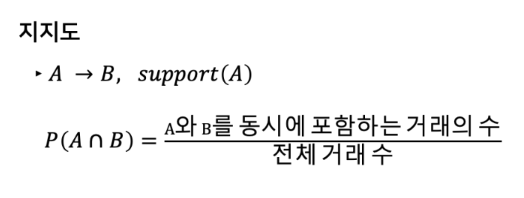


**신뢰도(Confidence)**
- 하나의 상품이 판매될 때 다른 상품이 같이 판매된 거래의 비율
- A -> B 신뢰도 : A 항목의 거래 중에서 B 항목이 포함된 거래의 비율
- A -> B 신뢰도 != B -> A 신뢰도
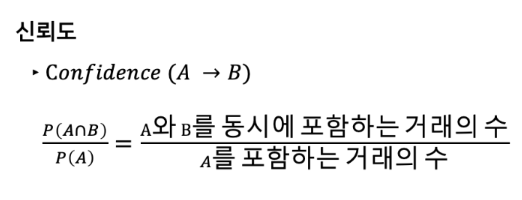


**향상도(Lift)**
- 하나의 상품판매가 다른 상품 판매 확률증가에 미친 영향
- A -> B 향상도 : A 항목을 구매하지 않았을 때 B 항목을 구매할 확률 대비, A 항목을 구매했을 때 B 항목을 구매할 확률의 증가 비율
- 향상도 = 1 : 두 품목은 독립, 서로 유의미한 연관성이 없음
- 향상도 > 1 : 양의 상관관계 (A 항목을 구매하면 B 항목 구매 확률 높음)
- 향상도 < 1 : 음의 상관관계 (A 항목을 구매하면 B 항목 구매 확률 낮음)
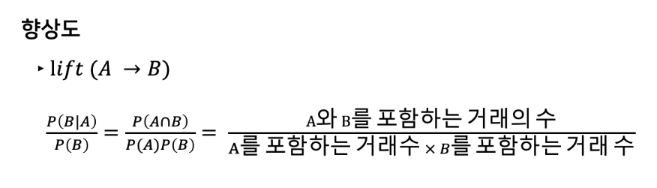

## 2. 연관규칙분석 실습

In [11]:
# 데이터 준비
import pandas as pd

data = pd.read_csv('./carrot.csv')
data.head()

,Apple,Corn,Icecream,Tomato,Onion,Orange,Yogurt,Bread,Carrot
0,False,False,False,True,True,False,True,True,True
1,False,False,False,True,True,False,False,True,True
2,True,False,False,False,True,False,True,False,False
3,False,True,False,False,False,True,True,True,False
4,False,True,True,False,True,False,False,False,True


In [13]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [14]:
# 연관규칙분석 모델 생성
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(data, min_support = 0.5, use_colnames = True)
# min_support = 최소지지도 숫자

association_rules(frequent_itemsets)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Carrot),(Onion),0.6,0.8,0.6,1.0,1.25,0.12,inf


**조건: "당근을 샀다면, 양파도 살 것이다"**

- antecedents : 조건
- consequents : 결과

- antecedent support : 전체 거래에서 "당근"이 등장한 비율
- consequent support : 전체 거래에서 "양파"가 등장한 비율
- support : **"지지도"** --> 0.6 = 60%
- confidence : **"신뢰도"** --> 1.0 = 당근을 산 사람은 모두 양파도 같이 구매함
- lift : **"향상도"** --> 1.25 = 당근을 구매했을 때 양파를 구매할 확율이 25% 향상

---

# [신경망]

## 1. 퍼셉트론
- 퍼셉트론 : 다수의 신호를 입력받아 계산하고 하나의 값을 출력
- 입력받은 신호는 가중치 (weight)와 함께 계산되어 출력신호로 변환
- 알고리즘에서 학습은 최적의 weight 값을 찾는 것

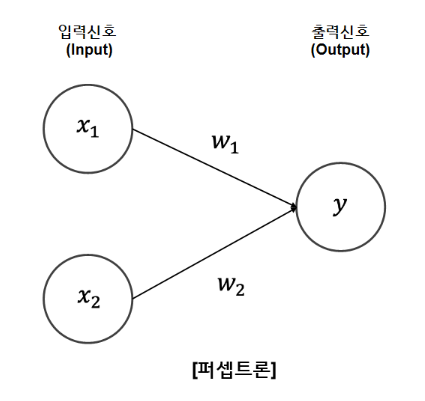

- x = 입력값 (input) 
- x1, x2 = input 노드
- W = 가중치 (weight)
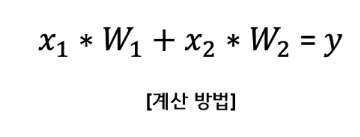
- y = sum (x * W) : 입력값과 가중치 값을 곱한 값들의 합


## 2. 신경망
- 신경망 모델은 퍼셉트론을 연결하여 형성 (은닉층 추가로 사용)
- input 데이터에 대한 입력층의 결과를 은닉층에서 계산
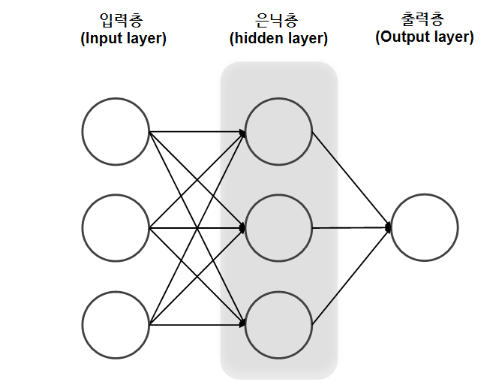

**다측신경망 (MultiLayer Neural Network)**
- 은닉층이 생성됨으로써 신경망 모델은 여러 층이 생기게 됨

**심층신경망 (Deep Neural Network)**
- 여러 개의 은닉층들로 이루어진 인공신경망

## 3. 신경망 실습

In [15]:
# 데이터 준비
import pandas as pd

data = pd.read_csv('./Student_Performance.csv')
data.head()

,preparation,math,reading,writing,gender
0,none,0.72,0.72,0.74,F
1,completed,0.69,0.90,0.88,F
2,none,0.90,0.95,0.93,F
3,none,0.47,0.57,0.44,M
4,none,0.76,0.78,0.75,M


In [16]:
from sklearn.neural_network import MLPClassifier

X = data[['math','reading','writing']]
y = data[['preparation']]

mlp_model = MLPClassifier()
mlp_model.fit(X,y)

score = mlp_model.score(X,y)
score

C:\Users\Sanghyuk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sanghyuk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.674